<a href="https://colab.research.google.com/github/gokilanr/Hacker-earth-exhibit-art-/blob/main/fer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opencv-python

In [ ]:
!pip install dlib

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=7573da388cc0ad384d6476beaba65faea1b69608dfcd79729cbdb79d0f48177e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 710.3 kB/s eta 0:00:00


In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
!git clone https://github.com/Decoding-Data-Science/fer-may-hackathon.git

Cloning into 'fer-may-hackathon'...
remote: Enumerating objects: 7139, done.
remote: Counting objects: 100% (7139/7139), done.
remote: Compressing objects: 100% (7125/7125), done.
remote: Total 7139 (delta 9), reused 7121 (delta 8), pack-reused 0
Receiving objects: 100% (7139/7139), 11.10 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
TRAIN_DIR = 'fer-may-hackathon/images/train'
TEST_DIR = 'fer-may-hackathon/images/validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(48, 48),  # Assuming the input size needed by your model
    batch_size=32,
    color_mode='grayscale',  # If your model expects grayscale inputs
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.


In [25]:
%%time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
225/225 [==============================] - 34s 145ms/step - loss: 1.8281 - accuracy: 0.2400 - val_loss: 1.7737 - val_accuracy: 0.2688
Epoch 2/100
225/225 [==============================] - 34s 149ms/step - loss: 1.8014 - accuracy: 0.2476 - val_loss: 1.7805 - val_accuracy: 0.2666
Epoch 3/100
225/225 [==============================] - 33s 147ms/step - loss: 1.7935 - accuracy: 0.2438 - val_loss: 1.7525 - val_accuracy: 0.2674
Epoch 4/100
225/225 [==============================] - 31s 138ms/step - loss: 1.7903 - accuracy: 0.2520 - val_loss: 1.7452 - val_accuracy: 0.2947
Epoch 5/100
225/225 [==============================] - 31s 140ms/step - loss: 1.7779 - accuracy: 0.2623 - val_loss: 1.7015 - val_accuracy: 0.3143
Epoch 6/100
225/225 [==============================] - 33s 146ms/step - loss: 1.7681 - accuracy: 0.2639 - val_loss: 1.7030 - val_accuracy: 0.3103
Epoch 7/100
225/225 [==============================] - 34s 150ms/step - loss: 1.7555 - accuracy: 0.2717 - val_loss: 1.7025 -

In [23]:
%time
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

# Include early stopping in your training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add early stopping to callbacks
)


CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 15.3 µs
Epoch 1/50
225/225 [==============================] - 33s 146ms/step - loss: 1.2992 - accuracy: 0.4958 - val_loss: 1.0575 - val_accuracy: 0.5998
Epoch 2/50
225/225 [==============================] - 32s 140ms/step - loss: 1.2905 - accuracy: 0.5106 - val_loss: 1.0791 - val_accuracy: 0.5834
Epoch 3/50
225/225 [==============================] - 34s 149ms/step - loss: 1.2719 - accuracy: 0.5148 - val_loss: 1.1035 - val_accuracy: 0.5894
Epoch 4/50
225/225 [==============================] - 34s 149ms/step - loss: 1.2927 - accuracy: 0.5078 - val_loss: 1.0696 - val_accuracy: 0.6022


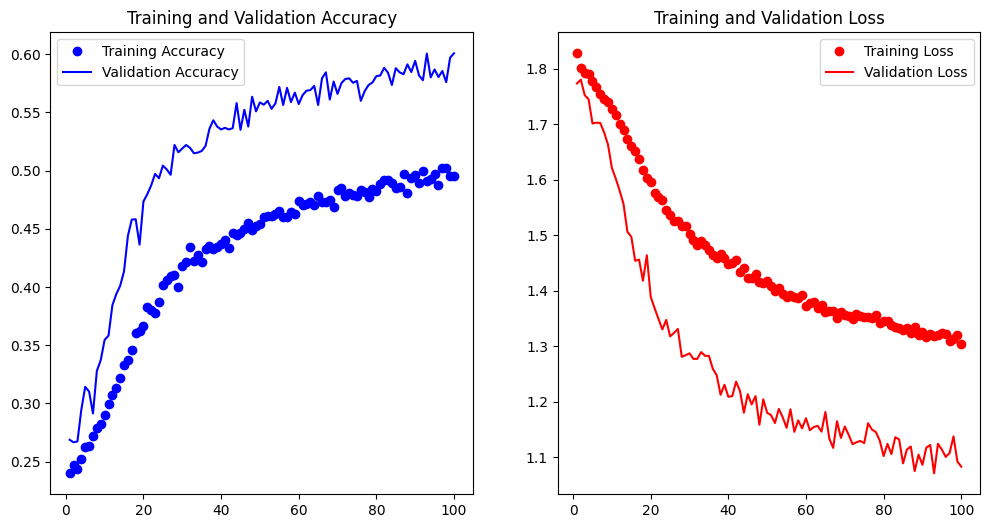

In [26]:
import matplotlib.pyplot as plt

# Assuming `history` is the return value from the `model.fit()` call
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and prepare the image
test_image = image.load_img('/content/fer-may-hackathon/images/validation/disgust/PublicTest_31237465.jpg', target_size=(48, 48), color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0

# Predict the emotion
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions, axis=1)

# Assuming you have a mapping of numeric labels to emotion names
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_labels[predicted_class[0]]

print("Predicted Emotion: ", predicted_emotion)

1/1 [==============================] - 0s 23ms/step
Predicted Emotion:  Fear


In [29]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

# Define the space of hyperparameters to search
space = [
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),
    Integer(32, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')
]

# Define the model building function
@use_named_args(space)
def evaluate_model(learning_rate, batch_size, dropout_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # Adjust according to your class count
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    # Data generators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(48, 48),
        batch_size=int(batch_size),
        color_mode='grayscale',
        class_mode='categorical'
    )

    validation_generator = validation_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(48, 48),
        batch_size=int(batch_size),
        color_mode='grayscale',
        class_mode='categorical'
    )

    # Fit the model
    history = model.fit(
        train_generator,
        epochs=10,  # Consider reducing for quicker iterations
        validation_data=validation_generator,
        verbose=0  # Keep verbose off to avoid too much log data
    )

    # We aim to minimize the negative accuracy
    return -history.history['val_accuracy'][-1]

# Running Bayesian Optimization
result = gp_minimize(evaluate_model, space, n_calls=12, random_state=0)


Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 c

In [32]:
print(result)

          fun: -0.34023991227149963
            x: [0.00039361280014637103, 37, 0.20906251783204532]
    func_vals: [-3.304e-01 -2.933e-01 -3.402e-01 -3.244e-01 -3.258e-01
                -3.296e-01 -3.302e-01 -3.034e-01 -3.282e-01 -3.212e-01
                -3.222e-01 -3.310e-01]
      x_iters: [[0.0015335192657991573, 113, 0.4431782470491028], [0.004948840736375756, 92, 0.25375268291708], [0.00039361280014637103, 37, 0.20906251783204532], [0.000902256947026915, 110, 0.291990868950023], [0.0006103368503860312, 112, 0.23495846416690738], [0.001978535031094702, 67, 0.48286206358121864], [0.00019085412933888727, 116, 0.28944321810948426], [0.0039978040531536176, 82, 0.37155181204758414], [0.002762264801799497, 88, 0.3149492917796043], [0.003290267810262663, 42, 0.289440167738663], [0.00029581879353024997, 128, 0.407888067641759], [0.00011137958052265495, 32, 0.2483371657261535]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(no

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the hyperparameter search space
space = [
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),
    Integer(32, 128, name='batch_size'),
    Real(0.1, 0.5, name='dropout_rate')
]

# Define the model evaluation function
@use_named_args(space)
def evaluate_model(learning_rate, batch_size, dropout_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(7, activation='softmax')  # Adjust according to your class count
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    # Data generators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(48, 48),
        batch_size=int(batch_size),
        color_mode='grayscale',
        class_mode='categorical'
    )

    validation_generator = validation_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(48, 48),
        batch_size=int(batch_size),
        color_mode='grayscale',
        class_mode='categorical'
    )

    # Fit the model
    history = model.fit(
        train_generator,
        epochs=10,  # Use fewer epochs for quicker iterations
        validation_data=validation_generator,
        verbose=0  # Keep verbose off to avoid too much log data
    )

    # We aim to minimize the negative accuracy
    accuracy = history.history['val_accuracy'][-1]
    return -accuracy

# Running Bayesian Optimization
result = gp_minimize(
    evaluate_model,
    space,
    n_calls=12,
    n_initial_points=10,
    acq_func='gp_hedge',
    random_state=0,
    n_jobs=1
)

# Best parameters and accuracy
print("Best parameters: %s" % result.x)
print("Best validation accuracy: %.2f%%" % (-result.fun * 100))


Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 3668 images belonging to 7 c

In [36]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


In [41]:
# Save the model
model.save('emotion_detection_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
import streamlit as st
import cv2
import tempfile
import tensorflow as tf
import numpy as np

# Load your trained model (ensure this path points to your saved model)
model = tf.keras.models.load_model('emotion_detection_model.h5')

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

st.title('Facial Emotion Recognition')

uploaded_file = st.file_uploader("Choose a video...", type=['mp4', 'avi', 'mov'])

if uploaded_file is not None:
    # Save the uploaded video to a temporary file
    tfile = tempfile.NamedTemporaryFile(delete=False)
    tfile.write(uploaded_file.read())

    # Initialize video capture
    cap = cv2.VideoCapture(tfile.name)

    stframe = st.empty()
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized_frame = cv2.resize(gray_frame, (48, 48))
        normalized_frame = resized_frame / 255.0
        reshaped_frame = np.reshape(normalized_frame, (1, 48, 48, 1))

        # Make prediction
        prediction = model.predict(reshaped_frame)
        emotion = emotion_labels[np.argmax(prediction)]

        # Display the frame with emotion label
        cv2.putText(frame, emotion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        stframe.image(frame, channels="BGR")

    cap.release()

